## Maximum likelihood estimation &dash; a toy example

We have a sample of $n$ coin flips (represented by the number of heads we got), but we don't know what is the "fairness" of the coin, described by the parameter $p$. This parameter describes how likely it is to observe a head in a single coinflip - 50%, if the coin is fair.

The goal is: given a sample of coin flips, estimate $p$.

In [1]:
# the true, unknown "fairness" of the coin
p <- 0.4

In [2]:
# total number of coin-flips
n_coinflips <- 100

In [3]:
# observed data - the number of heads after n coinflips
 # size = number of trials (potential outcomes)
(heads <- sum(rbinom(n = n_coinflips, size = 1, prob = p)))

[1] 38

In [4]:
library(tidyverse)
library(bdkn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.2.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘bdkn’

The following object is masked from ‘package:ggplot2’:

    %+%



### Finding the MLE using grid search

We will calculate and compare likelihoods of uniformly sampled values of $p$ using the binomial density function.

In [5]:
# a 1D "grid" of parameter values to explore
param <- seq(0, 1, length.out=100)

# likelihoods of the "grid points" given the observed number of heads
likelihoods <- map_dbl(param, ~ dbinom(heads, n_coinflips, .x))

In [6]:
param[which.max(likelihoods)]

[1] 0.3838384

#### Finding the MLE using the optimization algorithm:

We will use the `optimization` function which searches a given interval to find the minimum of some function $f$ with respect to its first argument. In this case, our function of interest is the binomial density function.

In [7]:
# Likelihood function to minimize - negative binomial density of p given:
#   - data: counts of heads
#   - n: number of coin flips
negLL <- function(data, n, p) {
    -dbinom(data, n, p, log = TRUE)
}

In [8]:
res <- optimize(negLL, interval=c(0, 1), data = heads, n = n_coinflips)

In [9]:
res

$minimum
[1] 0.3799914

$objective
[1] 2.501417

## Plotting MLE results of both methods

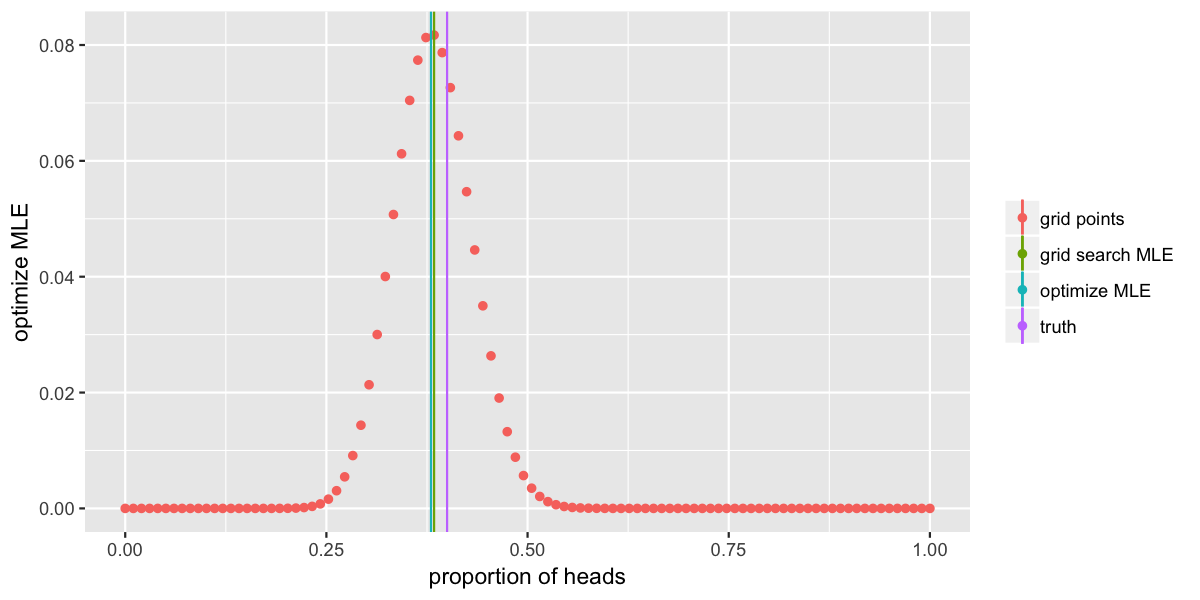

In [10]:
set_dim(8, 4, 150)

ggplot() +
    geom_point(aes(param, likelihoods, color = "grid points")) +
    geom_vline(aes(xintercept = param[which.max(likelihoods)], color = "grid search MLE")) +
    geom_vline(aes(xintercept = res$minimum, color = "optimize MLE")) +
    geom_vline(aes(xintercept = p, color = "truth")) +
    labs(x = "proportion of heads", y = "grid search MLE") +
    labs(x = "proportion of heads", y = "optimize MLE") +
    theme(legend.title = element_blank())

## Caution

In the example above, both of our MLE results got reasonably to the truth. However, our confidence in the MLE result will largely depend on the number of coinflips in our experiment. For example, flipping a perfectly fair coin only ten times can easily produce 8 heads out of 10, and the naive MLE approach (which is essentially a single value) could lead us to believe that the coin is probably loaded.